In [22]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm 

In [23]:
feat = pd.read_pickle('features.pkl')
feat.columns
#feat.info()

Index(['FIPS', 'CountyName', 'perc_in_labor_frc', 'perc_in_armfrc',
       'p_com_carpool', 'p_com_workhome', 'perc_occ_mgt', 'perc_occ_svc',
       'p_ind_whlesl', 'p_ind_info', 'p_ind_FIRE', 'p_ind_waste',
       'p_ind_edsvc', 'p_ind_pubadm', 'ln_popdens', 'ln_housedens',
       'p_nonfamily', 'p_marrfam', 'p_malehh', 'p_femhh', 'avg_hh_size',
       'fert_age15_19', 'fert_age20_34', 'fert_age35_50', 'p_highsch',
       'p_bachdeg', 'p_civvet', 'p_civdis_18', 'p_civdis_1864', 'p_civdis_65',
       'p_samehouse', 'p_diffhousUS', 'p_abroad1yr', 'p_nativeUS',
       'p_nativestate', 'p_nat_citz', 'p_spk_engl', 'PercBelowPov', 'pov_bins',
       'pov_bin'],
      dtype='object')

In [24]:
X_all = feat[['perc_in_labor_frc',
      'perc_in_armfrc', 'p_com_carpool', 'p_com_workhome', 'perc_occ_mgt',
       'perc_occ_svc', 'p_ind_whlesl', 'p_ind_info', 'p_ind_FIRE',
       'p_ind_waste', 'p_ind_edsvc', 'p_ind_pubadm', 'ln_popdens',
       'ln_housedens', 'p_nonfamily', 'p_marrfam', 'p_malehh', 'p_femhh',
       'avg_hh_size', 'fert_age15_19', 'fert_age20_34', 'fert_age35_50',
       'p_highsch', 'p_bachdeg', 'p_civvet', 'p_civdis_18', 'p_civdis_1864',
       'p_civdis_65', 'p_samehouse', 'p_diffhousUS', 'p_abroad1yr',
       'p_nativeUS', 'p_nativestate', 'p_nat_citz', 'p_spk_engl']]


X_imp = feat[['perc_in_labor_frc', 'perc_occ_mgt',
       'p_ind_edsvc', 'p_marrfam',   'p_femhh',  
       'p_highsch', 'p_civdis_1864', 'p_civdis_65', 
       'p_nat_citz'  
         ]]


X = X_imp

X = sm.add_constant(X)
X = X.fillna(0)

numpov = {"high_pov":3 ,"med_high" :2,"med_low":1,"low_pov":0}
feat['pov_bin_num'] = feat['pov_bins'].apply(numpov.get).astype(int)

y = feat['PercBelowPov']/100
y = feat['PercBelowPov']
y = feat['pov_bin']
#y = feat['pov_bin_num']




In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=898)
print(y_train.dtype,len(y_train))
X_train.info()

int64 2199
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2199 entries, 1252 to 2557
Data columns (total 10 columns):
const                2199 non-null int64
perc_in_labor_frc    2199 non-null float64
perc_occ_mgt         2199 non-null float64
p_ind_edsvc          2199 non-null float64
p_marrfam            2199 non-null float64
p_femhh              2199 non-null float64
p_highsch            2199 non-null float64
p_civdis_1864        2199 non-null float64
p_civdis_65          2199 non-null float64
p_nat_citz           2199 non-null float64
dtypes: float64(9), int64(1)
memory usage: 189.0 KB


In [26]:
from statsmodels.discrete import discrete_model

In [27]:
t_log = sm.Logit(y_train,X_train).fit()
print (t_log.summary())

Optimization terminated successfully.
         Current function value: 0.357869
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                pov_bin   No. Observations:                 2199
Model:                          Logit   Df Residuals:                     2189
Method:                           MLE   Df Model:                            9
Date:                Wed, 26 Oct 2016   Pseudo R-squ.:                  0.4837
Time:                        15:57:22   Log-Likelihood:                -786.95
converged:                       True   LL-Null:                       -1524.2
                                        LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const                21.0935      2.066     10.211      0.000        17.045    25.143
perc_in_

In [28]:
test_pred = t_log.predict(X_test)

In [42]:
t_log.params.values

array([  2.10935090e+01,  -1.00298724e-01,  -2.18022881e-02,
         8.97650827e-02,  -1.49548653e-01,   1.69737479e-01,
        -1.44897891e-01,   8.59881771e-02,   4.49464115e-02,
        -8.69465067e-03])

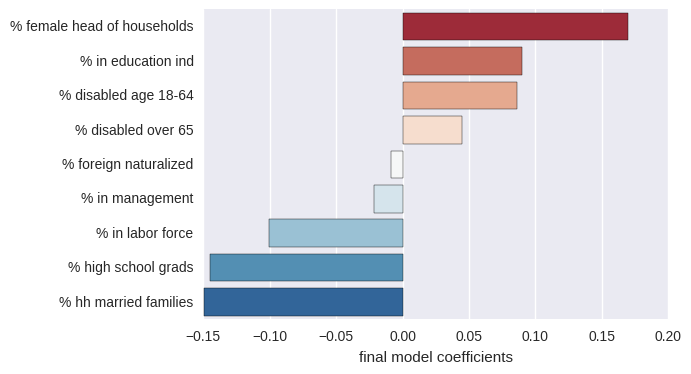

In [57]:
import seaborn as sns
data = {'coeffs': {'% in labor force': -0.1003, '% in management': -.0218, '% in education ind': .0898,
                        '% hh married families': -.1495, '% female head of households': .1697, '% high school grads': -.1449, 
                        '% disabled age 18-64': .0860, '% disabled over 65': .0449, '% foreign naturalized': -.0087}}
df_data = pd.DataFrame(data).sort_values('coeffs', ascending=False)
sns.barplot(x='coeffs', y=df_data.index, data=df_data, label='final model coefficients', palette='RdBu')
plt.xlabel("final model coefficients");


In [12]:
sm.Logit(y_train,X_train).fit_regularized

<bound method BinaryModel.fit_regularized of <statsmodels.discrete.discrete_model.Logit object at 0x7f56bd00bac8>>

In [9]:
t_reg = sm.Logit(y_train,X_train).fit_regularized(alpha=0.1,maxiter=10000, 
                                                  qc_verbose=True, trim_mode='size',
                                                 size_trim_tol =0.1)
print (t_reg.summary())

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.358855555891
            Iterations: 87
            Function evaluations: 99
            Gradient evaluations: 87
QC check did not pass for 4 out of 10 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
------ Recall the problem was rescaled by 1 / nobs ---
|passed    |alpha     |fprime    |param     |
--------------------------------------------
|True      |4.548e-05 |-4.543e-05|2.067e+01 |
|False     |4.548e-05 |4.856e-05 |-9.944e-02|
|True      |4.548e-05 |4.636e-05 |-2.161e-02|
|True      |4.548e-05 |-4.492e-05|8.998e-02 |
|False     |4.548e-05 |4.752e-05 |-1.477e-01|
|True      |4.548e-05 |-4.518e-05|1.724e-01 |
|False     |4.548e-05 |4.939e-05 |-1.426e-01|
|True      |4.548e-05 |-4.517e-05|8.710e-02 |
|True      |4.548e-05 |-4.500e-05|4.604e-02 |
|False     |4.548e-05 |5.057e-05 |-8.730e-03|
                           Logit Regression Re

In [10]:
pred = t_reg.predict(X_test)


In [12]:
re_y_test = y_test.copy()

In [13]:
re_y_test.index = list(range(943))
re_y_test
s_pred
df = pd.concat([s_pred, re_y_test], axis=1)
df.columns = ['predicted','test_actual']
df.columns

act0 = df[df['test_actual'] == 0]
act0.describe()

act1 = df[df['test_actual'] == 1]
act1.describe()

,predicted,test_actual
count,472.000000,472.0
mean,0.915232,1.0
std,0.104132,0.0
min,0.054082,1.0
25%,0.884329,1.0
50%,0.949845,1.0
75%,0.983073,1.0
max,0.999891,1.0


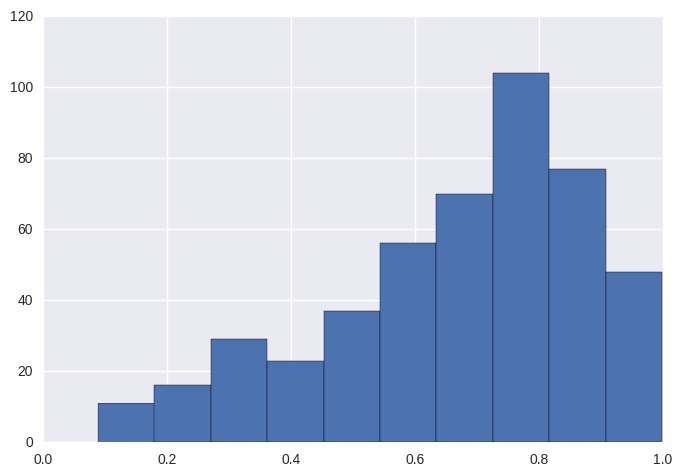

In [14]:
plt.hist(act0['predicted']);

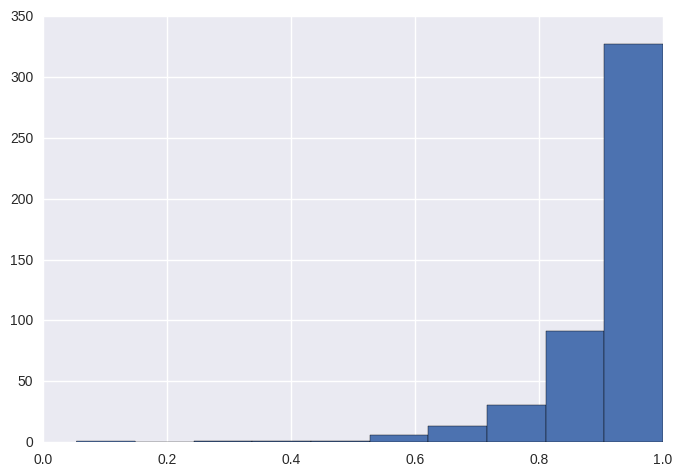

In [15]:
plt.hist(act1['predicted']);

In [16]:
X2 = feat[[ 
       'p_marrfam', 'p_femhh',
       'p_highsch', ]]
X2 = sm.add_constant(X2)
X2 = X2.fillna(0)

In [17]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.3,
                                                    random_state=42)

In [18]:
X2_train.describe()

,const,p_marrfam,p_femhh,p_highsch
count,2199.0,2199.000000,2199.000000,2199.000000
mean,1.0,51.704184,6.331878,85.163302
std,0.0,6.731549,2.399101,6.726009
min,1.0,23.200000,0.000000,46.700000
25%,1.0,48.300000,4.800000,80.900000
50%,1.0,52.100000,6.100000,86.600000
75%,1.0,55.900000,7.500000,90.300000
max,1.0,79.900000,20.400000,98.700000


In [19]:
t2_log = sm.Logit(y_train,X2_train).fit()
print (t2_log.summary())

Optimization terminated successfully.
         Current function value: 0.428996
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                pov_bin   No. Observations:                 2199
Model:                          Logit   Df Residuals:                     2195
Method:                           MLE   Df Model:                            3
Date:                Wed, 26 Oct 2016   Pseudo R-squ.:                  0.3809
Time:                        14:57:06   Log-Likelihood:                -943.36
converged:                       True   LL-Null:                       -1523.7
                                        LLR p-value:                2.427e-251
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         31.1060      1.621     19.194      0.000        27.930    34.282
p_marrfam     -0.1969      0.

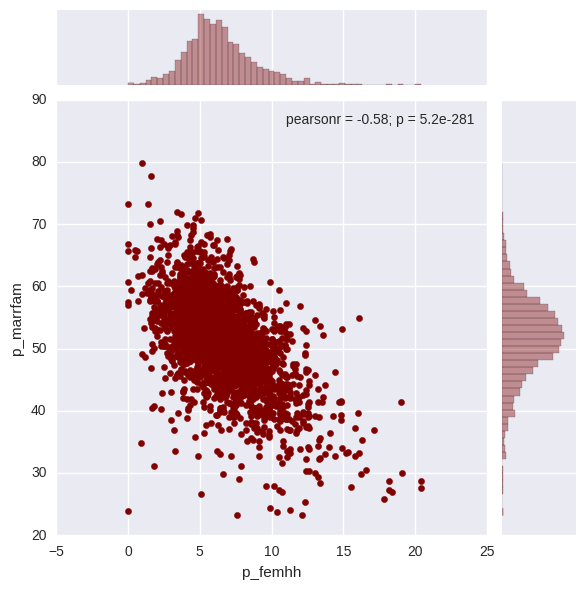

In [61]:
g = sb.jointplot('p_femhh', 'p_marrfam', X2, color='maroon')